In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
!pip install keras

In [8]:
!pip install tensorflow

In [10]:
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.models import Sequential
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


In [11]:
(train_images,train_labels),(test_images,test_labels)= cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [16]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
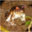

In [24]:
train_images[0]

In [17]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

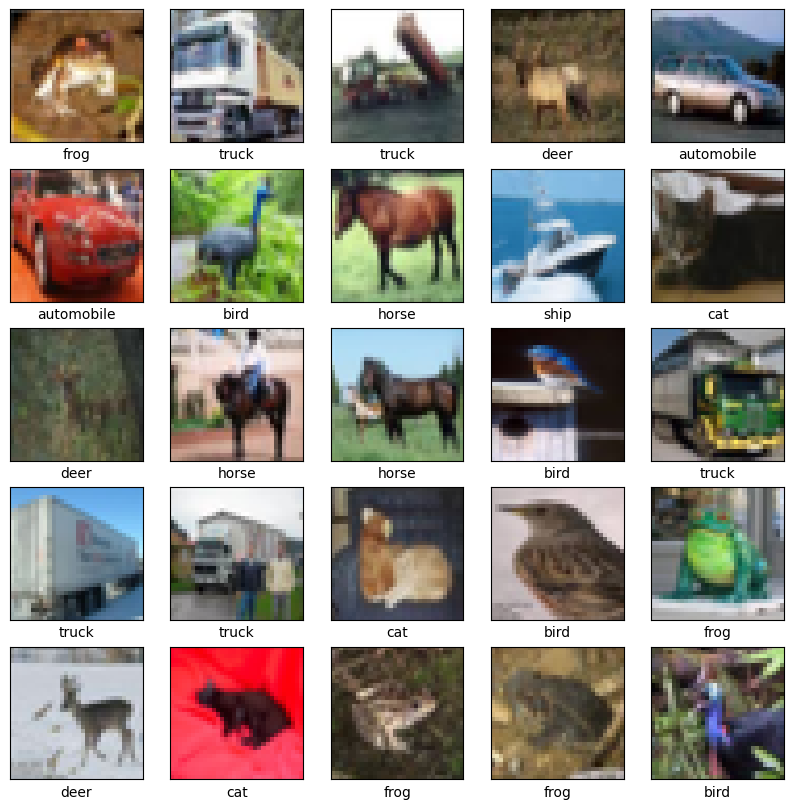

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

In [25]:
train_labels.shape

(50000, 1)

In [27]:
import keras

In [28]:
train_labels= keras.utils.to_categorical(train_labels)
test_labels= keras.utils.to_categorical(test_labels)

In [30]:
train_labels.shape

(50000, 10)

In [32]:
train_labels[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [47]:
epochs=5
batch_size=1000
n_classes=10

In [48]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3,)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(14,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(390,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(n_classes,activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 14)        4046      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 14)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 504)               0         
                                                                 
 dense (Dense)               (None, 390)             

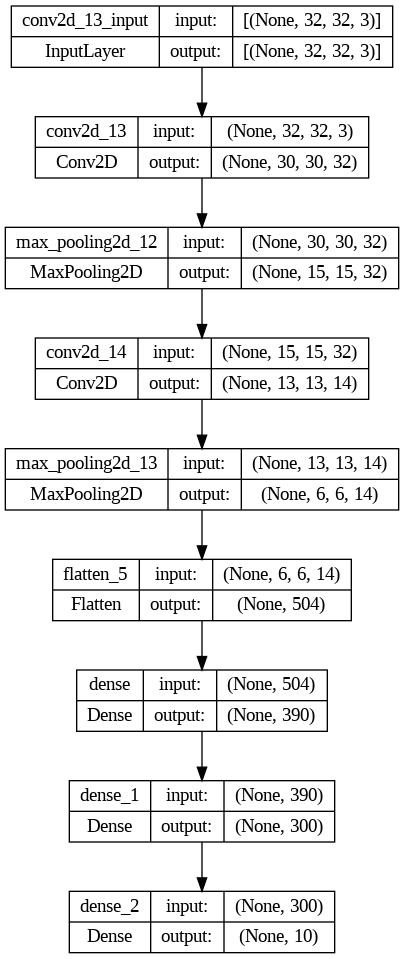

In [49]:
plot_model(model,show_shapes=True)

In [51]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics='accuracy')

In [71]:
history=model.fit(train_images,train_labels,epochs=10,batch_size=batch_size,validation_data=(test_images,test_labels))

Epoch 1/10
50/50 [==============================] - 45s 908ms/step - loss: 0.7563 - accuracy: 0.7413 - val_loss: 1.6062 - val_accuracy: 0.5256
Epoch 2/10
50/50 [==============================] - 51s 1s/step - loss: 0.6702 - accuracy: 0.7697 - val_loss: 1.7145 - val_accuracy: 0.5076
Epoch 3/10
50/50 [==============================] - 65s 1s/step - loss: 0.6345 - accuracy: 0.7803 - val_loss: 1.7324 - val_accuracy: 0.5209
Epoch 4/10
50/50 [==============================] - 48s 963ms/step - loss: 0.5411 - accuracy: 0.8125 - val_loss: 1.8007 - val_accuracy: 0.5235
Epoch 5/10
50/50 [==============================] - 40s 803ms/step - loss: 0.5057 - accuracy: 0.8245 - val_loss: 1.9862 - val_accuracy: 0.5140
Epoch 6/10
50/50 [==============================] - 40s 805ms/step - loss: 0.4519 - accuracy: 0.8463 - val_loss: 1.9964 - val_accuracy: 0.5140
Epoch 7/10
50/50 [==============================] - 43s 855ms/step - loss: 0.4165 - accuracy: 0.8618 - val_loss: 2.0204 - val_accuracy: 0.5193
Epoch

In [54]:
from PIL import Image

In [55]:
img=Image.open('/content/air.jpeg')

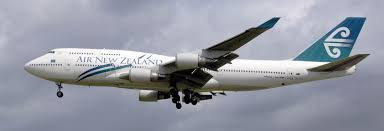

In [56]:
img

In [57]:
img.size

(384, 131)

In [63]:
img1=img.resize((32,32))

In [64]:
img1.size

(32, 32)

In [66]:
img2=np.expand_dims(img1,axis=0)

In [72]:
img2

array([[[[179, 181, 196],
         [182, 184, 199],
         [186, 187, 201],
         ...,
         [174, 175, 193],
         [175, 176, 194],
         [172, 173, 191]],

        [[177, 179, 194],
         [180, 183, 198],
         [185, 186, 200],
         ...,
         [177, 178, 196],
         [177, 178, 196],
         [172, 173, 191]],

        [[176, 178, 193],
         [178, 180, 195],
         [183, 184, 198],
         ...,
         [183, 183, 201],
         [179, 180, 198],
         [173, 174, 193]],

        ...,

        [[138, 144, 160],
         [142, 148, 164],
         [139, 146, 161],
         ...,
         [116, 122, 136],
         [117, 121, 136],
         [122, 124, 139]],

        [[139, 144, 163],
         [139, 144, 163],
         [133, 139, 157],
         ...,
         [116, 123, 137],
         [118, 123, 137],
         [122, 124, 139]],

        [[137, 143, 159],
         [133, 139, 157],
         [129, 134, 153],
         ...,
         [120, 123, 138],
        

In [68]:
img2.shape

(1, 32, 32, 3)

In [70]:
np.argmax(model.predict(img2))

1/1 [==============================] - 0s 48ms/step


0

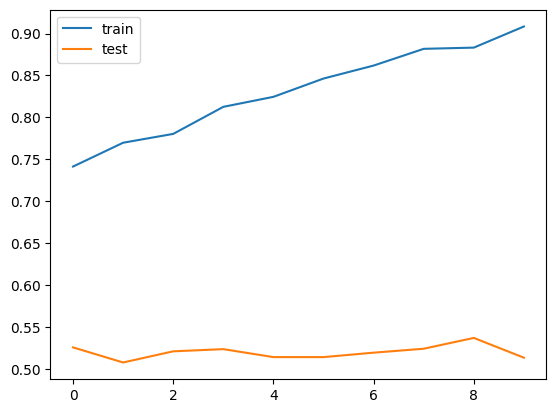

In [73]:
plt.plot(range(10),history.history['accuracy'],label='train')
plt.plot(range(10),history.history['val_accuracy'],label='test')
plt.legend(loc='best')

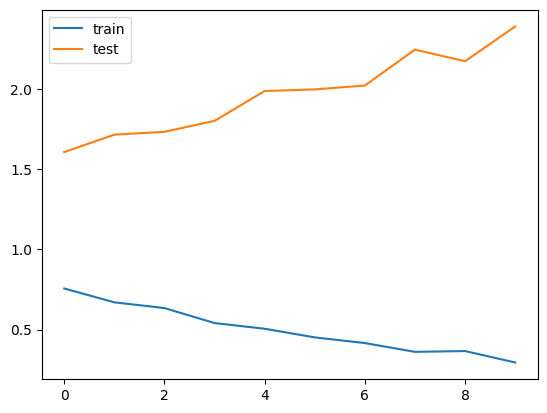

In [74]:
plt.plot(range(10),history.history['loss'],label='train')
plt.plot(range(10),history.history['val_loss'],label='test')
plt.legend(loc='best')